In [2]:
#finding spark
import findspark
findspark.init()

In [3]:
#imports
import pyspark.mllib.stat as st

##sql imports
from pyspark.sql import *
import pyspark.sql.types as typ
from pyspark.sql.session import SparkSession
import pyspark.sql.functions as fn

##for date functions
from datetime import datetime
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_date

## for file loading
import os

In [4]:
#Start Spark
from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [5]:
#Creating Schemas

In [6]:
labels_temp= [('State_Code',typ.IntegerType()),
          ('County_Code',typ.IntegerType()),
         ('Site_Num',typ.IntegerType()),
         ('Parameter_Code',typ.IntegerType()),
         ('POC',typ.IntegerType()),
         ('Latitude',typ.FloatType()),
         ('Longitude',typ.FloatType()),
         ('Datum',typ.StringType()),
         ('Parameter_Name',typ.StringType()),
         ('Sample_Duration',typ.StringType()),
         ('Pollutant_Standard',typ.StringType()),
         ('Date_Local',typ.StringType()),
          ('Units_of_Measure',typ.StringType()),
          ('Event_Type',typ.StringType()),
         ('Observation_Count',typ.IntegerType()),
         ('Observation_Percent',typ.IntegerType()),
         ('temp_Mean',typ.FloatType()),
         ('temp_1st_Max_Value',typ.FloatType()),
         ('temp_1st_Max_Hour',typ.FloatType()),
         ('AQI',typ.IntegerType()),
         ('Method_Code',typ.IntegerType()),
         ('Method_Name',typ.StringType()),
         ('Local_Site_Name',typ.StringType()),
         ('Address',typ.StringType()),
          ('State_Name',typ.StringType()),
          ('County_Name',typ.StringType()),
         ('City_Name',typ.StringType()),
         ('CBSA_Name',typ.StringType()),
         ('Date_of_Last_Change',typ.StringType())
         ]


schema_temp = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels_temp
])

In [7]:
labels_wind= [('State_Code',typ.IntegerType()),
          ('County_Code',typ.IntegerType()),
         ('Site_Num',typ.IntegerType()),
         ('Parameter_Code',typ.IntegerType()),
         ('POC',typ.IntegerType()),
         ('Latitude',typ.FloatType()),
         ('Longitude',typ.FloatType()),
         ('Datum',typ.StringType()),
         ('Parameter_Name',typ.StringType()),
         ('Sample_Duration',typ.StringType()),
         ('Pollutant_Standard',typ.StringType()),
         ('Date_Local',typ.StringType()),
          ('Units_of_Measure',typ.StringType()),
          ('Event_Type',typ.StringType()),
         ('Observation_Count',typ.IntegerType()),
         ('Observation_Percent',typ.IntegerType()),
         ('wind_Mean',typ.FloatType()),
         ('wind_1st_Max_Value',typ.FloatType()),
         ('wind_1st_Max_Hour',typ.FloatType()),
         ('AQI',typ.IntegerType()),
         ('Method_Code',typ.IntegerType()),
         ('Method_Name',typ.StringType()),
         ('Local_Site_Name',typ.StringType()),
         ('Address',typ.StringType()),
          ('State_Name',typ.StringType()),
          ('County_Name',typ.StringType()),
         ('City_Name',typ.StringType()),
         ('CBSA_Name',typ.StringType()),
         ('Date_of_Last_Change',typ.StringType())
         ]


schema_wind = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels_wind
])

In [8]:
labels_pressure= [('State_Code',typ.IntegerType()),
          ('County_Code',typ.IntegerType()),
         ('Site_Num',typ.IntegerType()),
         ('Parameter_Code',typ.IntegerType()),
         ('POC',typ.IntegerType()),
         ('Latitude',typ.FloatType()),
         ('Longitude',typ.FloatType()),
         ('Datum',typ.StringType()),
         ('Parameter_Name',typ.StringType()),
         ('Sample_Duration',typ.StringType()),
         ('Pollutant_Standard',typ.StringType()),
         ('Date_Local',typ.StringType()),
          ('Units_of_Measure',typ.StringType()),
          ('Event_Type',typ.StringType()),
         ('Observation_Count',typ.IntegerType()),
         ('Observation_Percent',typ.IntegerType()),
         ('pressure_Mean',typ.FloatType()),
         ('pressure_1st_Max_Value',typ.FloatType()),
         ('pressure_1st_Max_Hour',typ.FloatType()),
         ('AQI',typ.IntegerType()),
         ('Method_Code',typ.IntegerType()),
         ('Method_Name',typ.StringType()),
         ('Local_Site_Name',typ.StringType()),
         ('Address',typ.StringType()),
          ('State_Name',typ.StringType()),
          ('County_Name',typ.StringType()),
         ('City_Name',typ.StringType()),
         ('CBSA_Name',typ.StringType()),
         ('Date_of_Last_Change',typ.StringType())
         ]


schema_pressure = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels_pressure
])

In [9]:
labels = [('State_Code',typ.IntegerType()),
          ('County_Code',typ.IntegerType()),
         ('Site_Num',typ.IntegerType()),
         ('Parameter_Code',typ.IntegerType()),
         ('POC',typ.IntegerType()),
         ('Latitude',typ.FloatType()),
         ('Longitude',typ.FloatType()),
         ('Datum',typ.StringType()),
         ('Parameter_Name',typ.StringType()),
         ('Sample_Duration',typ.StringType()),
         ('Pollutant_Standard',typ.StringType()),
         ('Date_Local',typ.StringType()),
          ('Units_of_Measure',typ.StringType()),
          ('Event_Type',typ.StringType()),
         ('Observation_Count',typ.IntegerType()),
         ('Observation_Percent',typ.IntegerType()),
         ('Mean',typ.FloatType()),
         ('1st_Max_Value',typ.FloatType()),
         ('1st_Max_Hour',typ.FloatType()),
         ('AQI',typ.IntegerType()),
         ('Method_Code',typ.IntegerType()),
         ('Method_Name',typ.StringType()),
         ('Local_Site_Name',typ.StringType()),
         ('Address',typ.StringType()),
          ('State_Name',typ.StringType()),
          ('County_Name',typ.StringType()),
         ('City_Name',typ.StringType()),
         ('CBSA_Name',typ.StringType()),
         ('Date_of_Last_Change',typ.StringType())
         ]


schema = typ.StructType([
typ.StructField(e[0], e[1], False) for e in labels
])

In [10]:
#Loading Data

In [11]:
##Creating Paths
f_path = os.path.join(os.getcwd(), 'Files')
path_dict = {}
for i in os.listdir(f_path):
    path_dict[i+'_path'] = os.path.join(f_path, i, '*')

In [12]:
##Temp
temp_csv = spark.read.csv(path_dict['Temp_path'], header=True, schema=schema_temp)
temp_csv = temp_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
temp_csv = temp_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))

In [13]:
##Pressure
pressure_csv = spark.read.csv(path_dict['Pressure_path'], header=True, schema=schema_pressure)
pressure_csv = pressure_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
pressure_csv = pressure_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))

In [14]:
##Wind
wind_csv = spark.read.csv(path_dict['Wind_path'], header=True, schema=schema_wind)
wind_csv = wind_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
wind_csv = wind_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))

In [15]:
##Gasses
ozone_csv = spark.read.\
csv(path_dict['Ozone_path'],header=True, schema=schema)
so2_csv = spark.read.\
csv(path_dict['SO2_path'],header=True, schema=schema)
co_csv = spark.read.\
csv(path_dict['CO_path'],header=True, schema=schema)
no2_csv = spark.read.\
csv(path_dict['NO2_path'],header=True, schema=schema)


In [16]:
ozone_csv = ozone_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
ozone_csv = ozone_csv.withColumn('Date_of_Last_Change',to_date(col('Date_of_Last_Change'), 'yyyy-MM-dd'))

so2_csv = so2_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
so2_csv = so2_csv.withColumn('Date_of_Last_Change',to_date(col('Date_of_Last_Change'), 'yyyy-MM-dd'))

co_csv = co_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
co_csv = co_csv.withColumn('Date_of_Last_Change',to_date(col('Date_of_Last_Change'), 'yyyy-MM-dd'))

no2_csv = no2_csv.withColumn('Date_Local',to_date(col('Date_Local'), 'yyyy-MM-dd'))
no2_csv = no2_csv.withColumn('Date_of_Last_Change',to_date(col('Date_of_Last_Change'), 'yyyy-MM-dd'))

In [17]:
#Join

In [18]:
##Creating Views
temp_csv.createOrReplaceTempView("temp_csv")
wind_csv.createOrReplaceTempView("wind_csv")
pressure_csv.createOrReplaceTempView("pressure_csv")
ozone_csv.createOrReplaceTempView("ozone_csv")
so2_csv.createOrReplaceTempView("so2_csv")
co_csv.createOrReplaceTempView("co_csv")
no2_csv.createOrReplaceTempView("no2_csv")

In [19]:
##Creating Base Dateframe
df = spark.sql(""" Select ozone_csv.County_Code, ozone_csv.County_Name,ozone_csv.State_Code,ozone_csv.State_Name,ozone_csv.Site_Num,
    ozone_csv.City_name,ozone_csv.CBSA_Name, ozone_csv.Latitude,ozone_csv.Longitude,ozone_csv.Datum,ozone_csv.Date_Local, ozone_csv.AQI as AQI,
ozone_csv.Units_of_Measure as ozone_Units_of_Measure,ozone_csv.Mean as ozone_mean, ozone_csv.1st_Max_Value as ozone_1st_Max_Value,
    ozone_csv.Parameter_Code as ozone_Parameter_Code, ozone_csv.Parameter_Name as ozone_parameter_name, ozone_csv.Pollutant_Standard
    as ozone_Pollutant_Standard,    
so2_csv.Units_of_Measure as so2_Units_of_Measure, so2_csv.Mean as so2_mean,so2_csv.1st_Max_Value as so2_1st_Max_Value,
    so2_csv.Parameter_Code as so2_Parameter_Code, so2_csv.Parameter_Name as so2_parameter_name, so2_csv.Pollutant_Standard
    as so2_Pollutant_Standard,
co_csv.Units_of_Measure as co_Units_of_Measure,co_csv.Mean as co_mean,co_csv.1st_Max_Value as co_1st_Max_Value,
    co_csv.Parameter_Code as co_Parameter_Code,co_csv.Parameter_Name as co_parameter_name, co_csv.Pollutant_Standard
    as co_Pollutant_Standard,
no2_csv.Units_of_Measure as no2_Units_of_Measure,no2_csv.Mean as no2_mean,no2_csv.1st_Max_Value as no2_1st_Max_Value,
    no2_csv.Parameter_Code as no2_Parameter_Code,no2_csv.Parameter_Name as no2_parameter_name, no2_csv.Pollutant_Standard
    as no2_Pollutant_Standard,
wind_csv.Units_of_Measure as wind_Units_of_Measure, wind_csv.wind_Mean as wind_mean, wind_csv.wind_1st_Max_Value as wind_1st_Max_Value,
    wind_csv.Parameter_Code as wind_Parameter_Code, wind_csv.Parameter_Name as wind_parameter_name,
temp_csv.Units_of_Measure as temp_Units_of_Measure, temp_csv.temp_Mean as temp_mean, temp_csv.temp_1st_Max_Value as temp_1st_Max_Value,
    temp_csv.Parameter_Code as temp_Parameter_Code, temp_csv.Parameter_Name as temp_parameter_name,
pressure_csv.Units_of_Measure as press_Units_of_Measure, pressure_csv.pressure_Mean as press_mean, pressure_csv.pressure_1st_Max_Value as press_1st_Max_Value,
    pressure_csv.Parameter_Code as press_Parameter_Code, pressure_csv.Parameter_Name as press_parameter_name    
From ozone_csv 
Join so2_csv
    On ozone_csv.State_Code = so2_csv.State_code
    AND ozone_csv.County_Code = so2_csv.County_Code
    AND ozone_csv.Site_Num = so2_csv.Site_Num
    AND ozone_csv.Date_Local = so2_csv.Date_Local
Join co_csv
    On ozone_csv.State_Code = co_csv.State_code
    AND ozone_csv.County_Code = co_csv.County_Code
    AND ozone_csv.Site_Num = co_csv.Site_Num
    AND ozone_csv.Date_Local = co_csv.Date_Local
Join no2_csv
    On ozone_csv.State_Code = no2_csv.State_code
    AND ozone_csv.County_Code = no2_csv.County_Code
    AND ozone_csv.Site_Num = no2_csv.Site_Num
    AND ozone_csv.Date_Local = no2_csv.Date_Local
Join wind_csv
    On ozone_csv.State_Code = wind_csv.State_code
    AND ozone_csv.County_Code = wind_csv.County_Code
    AND ozone_csv.Site_Num = wind_csv.Site_Num
    AND ozone_csv.Date_Local = wind_csv.Date_Local
Join temp_csv
    On ozone_csv.State_Code = temp_csv.State_code
    AND ozone_csv.County_Code = temp_csv.County_Code
    AND ozone_csv.Site_Num = temp_csv.Site_Num
    AND ozone_csv.Date_Local = temp_csv.Date_Local
Join pressure_csv
    On ozone_csv.State_Code = pressure_csv.State_code
    AND ozone_csv.County_Code = pressure_csv.County_Code
    AND ozone_csv.Site_Num = pressure_csv.Site_Num
    AND ozone_csv.Date_Local = pressure_csv.Date_Local
Where ozone_csv.State_Code = 6
AND 
co_csv.Pollutant_Standard = 'CO 8-hour 1971'
AND
so2_csv.Pollutant_Standard = 'SO2 3-hour 1971'
AND
wind_csv.Parameter_Code = 61103
 """);

In [20]:
df.show(1)

+-----------+-----------+----------+----------+--------+-----------+--------------------+--------+----------+-----+----------+---+----------------------+----------+-------------------+--------------------+--------------------+------------------------+--------------------+--------+-----------------+------------------+------------------+----------------------+-------------------+-------+----------------+-----------------+-----------------+---------------------+--------------------+---------+-----------------+------------------+--------------------+----------------------+---------------------+---------+------------------+-------------------+--------------------+---------------------+---------+------------------+-------------------+-------------------+----------------------+----------+-------------------+--------------------+--------------------+
|County_Code|County_Name|State_Code|State_Name|Site_Num|  City_name|           CBSA_Name|Latitude| Longitude|Datum|Date_Local|AQI|ozone_Units_of_

In [21]:
df.cache().count()

7633

In [58]:
df.createOrReplaceTempView("df")
df_onedate=spark.sql("select Date_Local from df where YEAR(DATE_LOCAL)=2016")
df_onedate.show()

+----------+
|Date_Local|
+----------+
+----------+



In [25]:
df.dropDuplicates()
print('Count of rows: {0}'.format(df.count()))
print('Count of distinct records: {0}'\
      .format(df.select([c for c in df.columns]).distinct().count()))

df = df.dropDuplicates(subset=[
c for c in df.columns
])

df = df.withColumn('AQI_id',fn.monotonically_increasing_id())
df.count()

df.agg(*[
(1 - (fn.count(c) / fn.count('*'))).alias(c + '_missing') \
for c in df.columns
])#.show()
df.count()

Count of rows: 7576
Count of distinct records: 7576


7576

In [ ]:
county_wise_aqi=spark.sql("""select County_Name,avg(AQI) from df group by County_Name order by avg(AQI) desc """)
county_wise_aqi.show()

In [ ]:
year_wise_Aqi_san_diego=spark.sql("""select County_Name,avg(AQI),YEAR(DATE_LOCAL) as year from df where
County_Name='San Diego' 
group by YEAR(date_local),County_Name order by YEAR(DATE_LOCAL)""")
year_wise_Aqi_san_diego = year_wise_Aqi_san_diego.toPandas()
p3=year_wise_Aqi_san_diego.plot.bar(x='year',y='avg(AQI)')
display()

year_wise_Aqi_Los_Angeles=spark.sql("""select County_Name,avg(AQI),YEAR(DATE_LOCAL) as year from df where
County_Name='Los Angeles' 
group by YEAR(date_local),County_Name order by YEAR(DATE_LOCAL)""")
year_wise_Aqi_Los_Angeles = year_wise_Aqi_Los_Angeles.toPandas()
p3=year_wise_Aqi_Los_Angeles.plot.bar(x='year',y='avg(AQI)')
display()


year_wise_Aqi_Riverside=spark.sql("""select County_Name,avg(AQI),YEAR(DATE_LOCAL) as year from df where 
County_Name='Riverside' 
group by YEAR(date_local),County_Name order by YEAR(DATE_LOCAL)""")
year_wise_Aqi_Riverside = year_wise_Aqi_Riverside.toPandas()
p3=year_wise_Aqi_Riverside.plot.bar(x='year',y='avg(AQI)')
display()

year_wise_Aqi_San_Bernardino=spark.sql("""select County_Name,avg(AQI),YEAR(DATE_LOCAL) as year from df where 
County_Name='San Bernardino' 
group by YEAR(date_local),County_Name order by YEAR(DATE_LOCAL)""")
year_wise_Aqi_San_Bernardino = year_wise_Aqi_San_Bernardino.toPandas()
p3=year_wise_Aqi_San_Bernardino.plot.bar(x='year',y='avg(AQI)')
display()

In [ ]:
weekday_wise_Aqi_san_diego=spark.sql("""select avg(AQI),WEEKDAY(DATE_LOCAL) as weekday from df where County_Name='San Diego' 
group by WEEKDAY(date_local),County_Name order by WEEKDAY(DATE_LOCAL)""")
weekday_wise_Aqi_san_diego = weekday_wise_Aqi_san_diego.toPandas()
p3=weekday_wise_Aqi_san_diego.plot.bar(x='weekday',y='avg(AQI)')
display()

weekday_wise_Aqi_Los_Angeles=spark.sql("""select avg(AQI),WEEKDAY(DATE_LOCAL) as weekday from df where County_Name='Los Angeles' 
group by WEEKDAY(date_local),County_Name order by WEEKDAY(DATE_LOCAL)""")
weekday_wise_Aqi_Los_Angeles = weekday_wise_Aqi_Los_Angeles.toPandas()
p3=weekday_wise_Aqi_Los_Angeles.plot.bar(x='weekday',y='avg(AQI)')
display()

weekday_wise_Aqi_Riverside=spark.sql("""select avg(AQI),WEEKDAY(DATE_LOCAL) as weekday from df where County_Name='Riverside' 
group by WEEKDAY(date_local),County_Name order by WEEKDAY(DATE_LOCAL)""")
weekday_wise_Aqi_Riverside = weekday_wise_Aqi_Riverside.toPandas()
p3=weekday_wise_Aqi_Los_Angeles.plot.bar(x='weekday',y='avg(AQI)')
display()

weekday_wise_Aqi_San_Bernardino=spark.sql("""select avg(AQI),WEEKDAY(DATE_LOCAL) as weekday from df where County_Name='San Bernardino' 
group by WEEKDAY(date_local),County_Name order by WEEKDAY(DATE_LOCAL)""")
weekday_wise_Aqi_San_Bernardino = weekday_wise_Aqi_San_Bernardino.toPandas()
p3=weekday_wise_Aqi_San_Bernardino.plot.bar(x='weekday',y='avg(AQI)')
display()

weekday_wise_Aqi=spark.sql("""select avg(AQI),WEEKDAY(DATE_LOCAL) as weekday from df 
group by WEEKDAY(date_local) order by WEEKDAY(DATE_LOCAL)""")
weekday_wise_Aqi = weekday_wise_Aqi.toPandas()
p3=weekday_wise_Aqi.plot.bar(x='weekday',y='avg(AQI)')
display()

In [ ]:
month_wise_Aqi=spark.sql("""select avg(AQI),MONTH(DATE_LOCAL) as month from df 
group by MONTH(date_local) order by MONTH(DATE_LOCAL)""")
month_wise_Aqi = month_wise_Aqi.toPandas()
p3=month_wise_Aqi.plot.bar(x='month',y='avg(AQI)')
display()

month_wise_Aqi_San_Diego=spark.sql("""select avg(AQI),MONTH(DATE_LOCAL) as month from df where County_Name='San Diego' 
group by MONTH(date_local),County_Name order by MONTH(DATE_LOCAL)""")
month_wise_Aqi_San_Diego = month_wise_Aqi_San_Diego.toPandas()
p3=month_wise_Aqi_San_Diego.plot.bar(x='month',y='avg(AQI)')
display()

month_wise_Aqi_Los_Angeles=spark.sql("""select avg(AQI),MONTH(DATE_LOCAL) as month from df where County_Name='Los Angeles' 
group by MONTH(date_local),County_Name order by MONTH(DATE_LOCAL)""")
month_wise_Aqi_Los_Angeles = month_wise_Aqi_Los_Angeles.toPandas()
p3=month_wise_Aqi_Los_Angeles.plot.bar(x='month',y='avg(AQI)')
display()

month_wise_Aqi_Riverside=spark.sql("""select avg(AQI),MONTH(DATE_LOCAL) as month from df where County_Name='Riverside' 
group by MONTH(date_local),County_Name order by MONTH(DATE_LOCAL)""")
month_wise_Aqi_Riverside = month_wise_Aqi_Riverside.toPandas()
p3=month_wise_Aqi_Riverside.plot.bar(x='month',y='avg(AQI)')
display()

month_wise_Aqi_San_Bernardino=spark.sql("""select avg(AQI),MONTH(DATE_LOCAL) as month from df where County_Name='San Bernardino' 
group by MONTH(date_local),County_Name order by MONTH(DATE_LOCAL)""")
month_wise_Aqi_San_Bernardino = month_wise_Aqi_San_Bernardino.toPandas()
p3=month_wise_Aqi_San_Bernardino.plot.bar(x='month',y='avg(AQI)')
display()

In [ ]:
# AQI to demographic features
# With increase in temperature AQI increases 
temp_wise_Aqi=spark.sql("""select AQI,temp_Mean as temp from df 
where County_Name='Riverside'""")
temp_wise_Aqi = temp_wise_Aqi.toPandas()
p3=temp_wise_Aqi.plot.scatter(x='AQI',y='temp')


pressure_wise_Aqi=spark.sql("""select AQI,press_mean as pressure from df 
where County_Name='Riverside'""")
pressure_wise_Aqi = pressure_wise_Aqi.toPandas()
p3=pressure_wise_Aqi.plot.scatter(x='AQI',y='pressure')

wind_wise_Aqi=spark.sql("""select AQI,wind_mean as wind from df 
where County_Name='Riverside'""")
wind_wise_Aqi = wind_wise_Aqi.toPandas()
p3=wind_wise_Aqi.plot(x='AQI',y='wind',kind='scatter')

In [ ]:
# AQI to pollutants
# With increase in ozone AQI increases linearly
ozone_wise_Aqi=spark.sql("""select AQI,ozone_mean as ozone from df 
where County_Name='Riverside'""")
ozone_wise_Aqi = ozone_wise_Aqi.toPandas()
p3=ozone_wise_Aqi.plot.scatter(x='AQI',y='ozone')

co_wise_Aqi=spark.sql("""select AQI,co_mean as carbonMonoxide from df 
where County_Name='Riverside'""")
co_wise_Aqi = co_wise_Aqi.toPandas()
p3=co_wise_Aqi.plot.scatter(x='AQI',y='carbonMonoxide')

In [27]:
numerical = ['Latitude','Longitude','AQI', 'ozone_mean', 'ozone_1st_Max_Value', 'so2_mean', 'so2_1st_Max_Value',\
            'co_mean', 'co_1st_Max_Value', 'no2_mean', 'no2_1st_Max_Value', 'wind_mean', 'wind_1st_Max_Value',\
            'temp_mean', 'temp_1st_Max_Value', 'press_mean', 'press_1st_Max_Value']

descriptive_statistics = df.describe(numerical)

descriptive_statistics.show()

+-------+-------------------+-------------------+-----------------+--------------------+--------------------+-------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-------------------+
|summary|           Latitude|          Longitude|              AQI|          ozone_mean| ozone_1st_Max_Value|           so2_mean| so2_1st_Max_Value|           co_mean|   co_1st_Max_Value|         no2_mean| no2_1st_Max_Value|         wind_mean|wind_1st_Max_Value|        temp_mean|temp_1st_Max_Value|        press_mean|press_1st_Max_Value|
+-------+-------------------+-------------------+-----------------+--------------------+--------------------+-------------------+------------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+----

In [28]:
features_selected=['Longitude','Latitude','ozone_mean','so2_1st_Max_Value','co_mean','no2_mean',
                   'wind_1st_Max_Value','temp_mean','press_1st_Max_Value','AQI']
df_transformed = df.select(features_selected)

In [29]:
#correlations
import six
for i in df_transformed.columns:
    if not( isinstance(df_transformed.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to AQI for ", i, df_transformed.stat.corr('AQI',i))

Correlation to AQI for  Longitude 0.20335337095727038
Correlation to AQI for  Latitude 0.0787319937682298
Correlation to AQI for  ozone_mean 0.783685639574449
Correlation to AQI for  so2_1st_Max_Value 0.09814862043152409
Correlation to AQI for  co_mean -0.1439437199228721
Correlation to AQI for  no2_mean -0.11193489810228979
Correlation to AQI for  wind_1st_Max_Value 0.14121001440759373
Correlation to AQI for  temp_mean 0.6423403781233614
Correlation to AQI for  press_1st_Max_Value -0.39219794187311086
Correlation to AQI for  AQI 1.0


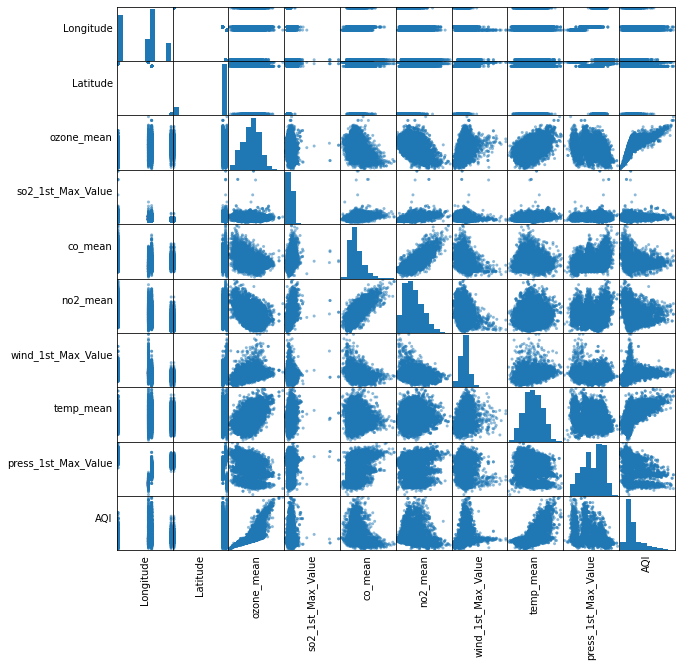

In [30]:
import pandas as pd

sampled_data = df_transformed.select(features_selected).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [31]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

vectorAssembler = VectorAssembler(inputCols=['Longitude','Latitude','ozone_mean','so2_1st_Max_Value','co_mean','no2_mean',
                   'wind_1st_Max_Value','temp_mean','press_1st_Max_Value'],outputCol='features')
linear_reg_df = vectorAssembler.transform(df_transformed)
linear_reg_df = linear_reg_df.select(['features', 'AQI'])
train_lr_data, test_lr_data = linear_reg_df.randomSplit([0.7,.3])
train_lr_data.printSchema()


root
 |-- features: vector (nullable = true)
 |-- AQI: integer (nullable = true)



In [32]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='AQI', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_lr_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))
lr_predictions = lr_model.transform(test_lr_data)
lr_predictions.select("prediction","AQI","features").show(5)

from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="AQI",metricName="r2")
lr_evaluator1 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="AQI",metricName="rmse")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))
print("Root Mean Square Error(RMSE) on test data= %g" %lr_evaluator1.evaluate(lr_predictions))

Coefficients: [12.049169228616913,16.91930250573807,2341.9076647340767,-1.8480872024064483,0.0,1.0421305901012177,-1.181963342063109,0.8485118850000413,0.0]
Intercept: 762.0826148635525
+------------------+---+--------------------+
|        prediction|AQI|            features|
+------------------+---+--------------------+
| 3.525983679800561| 19|[-118.22688293457...|
|1.8250952819162194| 23|[-118.22688293457...|
|29.138941164849143| 24|[-118.22688293457...|
| 74.66179040394536|108|[-118.22688293457...|
| 76.91292106010974| 46|[-118.22688293457...|
+------------------+---+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.800102
Root Mean Square Error(RMSE) on test data= 15.0768


In [33]:
#DecisionTreeRegression
from pyspark.ml.regression import DecisionTreeRegressor

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'AQI')
dt_model = dt.fit(train_lr_data)
dt_predictions = dt_model.transform(test_lr_data)
dt_evaluator = RegressionEvaluator(
    labelCol="AQI", predictionCol="prediction", metricName="r2")
r22 = dt_evaluator.evaluate(dt_predictions)
print("R Squared (R2) on test data = %g" % r22)
dt_evaluator1 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="AQI",metricName="rmse")
print("Root Mean Square Error(RMSE) on test data= %g" %dt_evaluator1.evaluate(dt_predictions))

R Squared (R2) on test data = 0.869417
Root Mean Square Error(RMSE) on test data= 12.1857


In [34]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'AQI', maxIter=10)
gbt_model = gbt.fit(train_lr_data)
gbt_predictions = gbt_model.transform(test_lr_data)
gbt_predictions.select('prediction', 'AQI', 'features').show(5)
gbt_evaluator = RegressionEvaluator(
    labelCol="AQI", predictionCol="prediction", metricName="r2")
r21= gbt_evaluator.evaluate(gbt_predictions)
print("R Squared (R2) on test data = %g" % r21)
gbt_evaluator1 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="AQI",metricName="rmse")
print("Root Mean Square Error(RMSE) on test data= %g" %gbt_evaluator1.evaluate(gbt_predictions))

+------------------+---+--------------------+
|        prediction|AQI|            features|
+------------------+---+--------------------+
|19.995864263686084| 19|[-118.22688293457...|
| 25.72909975091846| 23|[-118.22688293457...|
|35.738754341073324| 24|[-118.22688293457...|
| 51.92223956644983|108|[-118.22688293457...|
| 56.15354731093478| 46|[-118.22688293457...|
+------------------+---+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.899461
Root Mean Square Error(RMSE) on test data= 10.6924
